In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import time
from datetime import datetime
from pathlib import Path
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd
from scipy.stats import pearsonr

In [2]:
ff_path = Path(r"C:\Users\Mathiass\OneDrive - Universität Zürich UZH\Documents\mt_literature\data\FamaFrench\F-F_Research_Data_5_Factors_2x3.csv")

In [3]:
ff_monthly = pd.read_csv(ff_path, skiprows=2).iloc[:706]

In [4]:
ff_monthly

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.44,-0.89,0.68,-1.23,0.27
1,196308,5.07,-0.75,1.68,0.36,-0.34,0.25
2,196309,-1.57,-0.55,0.08,-0.71,0.29,0.27
3,196310,2.53,-1.37,-0.14,2.80,-2.02,0.29
4,196311,-0.85,-0.89,1.81,-0.51,2.31,0.27
...,...,...,...,...,...,...,...
701,202112,3.10,-0.69,3.22,4.75,4.36,0.01
702,202201,-6.25,-3.95,12.74,0.73,7.73,0.00
703,202202,-2.29,2.90,3.09,-2.12,2.99,0.00
704,202203,3.06,-2.14,-1.82,-1.32,3.24,0.00


In [5]:
pd.read_csv(ff_path, skiprows=2, usecols=["Unnamed: 0", "RF"]).iloc[:706]

,Unnamed: 0,RF
0,196307,0.27
1,196308,0.25
2,196309,0.27
3,196310,0.29
4,196311,0.27
...,...,...
701,202112,0.01
702,202201,0.00
703,202202,0.00
704,202203,0.00


In [6]:
# ff_monthly["Mkt-RF"] = ff_monthly["Mkt-RF"].astype("float")

In [7]:
# Rename Unnamed: 0 to Date and convert to appropriate Datetime format.
ff_monthly = ff_monthly.rename(columns={"Unnamed: 0": "Date"})
ff_monthly["Date"] = pd.to_datetime(ff_monthly["Date"], format="%Y%m") + MonthEnd(0)
ff_monthly = ff_monthly.set_index("Date")

In [8]:
# Convert ff columns to float (have been read as strings)
for col in ff_monthly.columns:
    ff_monthly[col] = ff_monthly[col].astype("float")

In [9]:
ff_monthly =  ff_monthly / 100

In [10]:
ff_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-31,-0.0039,-0.0044,-0.0089,0.0068,-0.0123,0.0027
1963-08-31,0.0507,-0.0075,0.0168,0.0036,-0.0034,0.0025
1963-09-30,-0.0157,-0.0055,0.0008,-0.0071,0.0029,0.0027
1963-10-31,0.0253,-0.0137,-0.0014,0.0280,-0.0202,0.0029
1963-11-30,-0.0085,-0.0089,0.0181,-0.0051,0.0231,0.0027
...,...,...,...,...,...,...
2021-12-31,0.0310,-0.0069,0.0322,0.0475,0.0436,0.0001
2022-01-31,-0.0625,-0.0395,0.1274,0.0073,0.0773,0.0000
2022-02-28,-0.0229,0.0290,0.0309,-0.0212,0.0299,0.0000


In [11]:
path = Path(r"C:\Users\Mathiass\OneDrive - Universität Zürich UZH\Documents\mt_literature\data\VIX")

In [12]:
vix = pd.read_csv(path/"VIX_History.csv", parse_dates=["DATE"])

In [13]:
som_indeces = np.sort(np.concatenate([np.where(vix["DATE"].dt.month.diff() == 1)[0], np.where(vix["DATE"].dt.month.diff() == -11)[0]]))

In [14]:
vix_monthly = vix.iloc[som_indeces - 1].rename(columns={"DATE": "Date"})

In [15]:
vix_monthly.head(13)

,Date,OPEN,HIGH,LOW,CLOSE
21,1990-01-31,25.36,25.36,25.36,25.36
40,1990-02-28,21.99,21.99,21.99,21.99
62,1990-03-30,19.73,19.73,19.73,19.73
82,1990-04-30,19.52,19.52,19.52,19.52
104,1990-05-31,17.37,17.37,17.37,17.37
125,1990-06-29,15.50,15.50,15.50,15.50
146,1990-07-31,21.11,21.11,21.11,21.11
169,1990-08-31,29.90,29.90,29.90,29.90
188,1990-09-28,29.11,29.11,29.11,29.11
211,1990-10-31,30.04,30.04,30.04,30.04


In [16]:
vix_monthly = vix_monthly.set_index("Date")

In [17]:
vix_monthly

,OPEN,HIGH,LOW,CLOSE
Date,,,,
1990-01-31,25.36,25.36,25.36,25.36
1990-02-28,21.99,21.99,21.99,21.99
1990-03-30,19.73,19.73,19.73,19.73
1990-04-30,19.52,19.52,19.52,19.52
1990-05-31,17.37,17.37,17.37,17.37
...,...,...,...,...
2022-01-31,28.36,29.41,24.71,24.83
2022-02-28,32.44,33.51,28.43,30.15
2022-03-31,19.68,21.48,19.54,20.56


In [18]:
vix_monthly.index = vix_monthly.index + MonthEnd(0)

In [19]:
vix_monthly["CLOSE"]

Date
1990-01-31    25.36
1990-02-28    21.99
1990-03-31    19.73
1990-04-30    19.52
1990-05-31    17.37
              ...  
2022-01-31    24.83
2022-02-28    30.15
2022-03-31    20.56
2022-04-30    33.40
2022-05-31    26.19
Name: CLOSE, Length: 389, dtype: float64

In [20]:
vix.iloc[:22]

,DATE,OPEN,HIGH,LOW,CLOSE
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26
5,1990-01-09,22.20,22.20,22.20,22.20
6,1990-01-10,22.44,22.44,22.44,22.44
7,1990-01-11,20.05,20.05,20.05,20.05
8,1990-01-12,24.64,24.64,24.64,24.64
9,1990-01-15,26.34,26.34,26.34,26.34


In [21]:
vvix = pd.read_csv(path/"VVIX_History.csv", parse_dates=["DATE"])

In [22]:
som_indeces = np.sort(np.concatenate([np.where(vvix["DATE"].dt.month.diff() == 1)[0], np.where(vvix["DATE"].dt.month.diff() == -11)[0]]))

In [23]:
vvix_monthly = vvix.iloc[som_indeces - 1].rename(columns={"DATE": "Date"})

In [24]:
vvix_monthly = vvix_monthly.set_index("Date")

In [25]:
vvix_monthly.index = vvix_monthly.index + MonthEnd(0)

In [26]:
vvix.head(10)

,DATE,VVIX
0,2006-03-06,71.73
1,2006-03-15,15.71
2,2006-03-16,27.94
3,2006-03-17,28.60
4,2006-03-20,37.93
5,2006-03-21,37.35
6,2006-04-11,69.55
7,2006-04-24,63.42
8,2006-04-25,61.33
9,2006-05-01,61.96


In [27]:
vix_monthly

,OPEN,HIGH,LOW,CLOSE
Date,,,,
1990-01-31,25.36,25.36,25.36,25.36
1990-02-28,21.99,21.99,21.99,21.99
1990-03-31,19.73,19.73,19.73,19.73
1990-04-30,19.52,19.52,19.52,19.52
1990-05-31,17.37,17.37,17.37,17.37
...,...,...,...,...
2022-01-31,28.36,29.41,24.71,24.83
2022-02-28,32.44,33.51,28.43,30.15
2022-03-31,19.68,21.48,19.54,20.56


In [28]:
vvix_monthly

,VVIX
Date,
2006-03-31,37.35
2006-04-30,61.33
2006-05-31,77.44
2006-06-30,92.10
2006-07-31,92.79
...,...
2022-01-31,125.06
2022-02-28,123.64
2022-03-31,111.45


In [29]:
exp_path = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis\logs\old\clustersmall5")

In [30]:
# Read aggregated portfolios.
print("Reading aggregated portfolios from 'portfolios' folder...")
path_portfolios = exp_path/"portfolios"
dfs = []
for file in Path.iterdir(path_portfolios):
    if file.name=="long4short0.csv":
        try:
            df = pd.read_csv(path_portfolios/file, parse_dates=["date"], index_col="date")
        except PermissionError as err:
            raise PermissionError("The 'portfolios' subfolder must not contain directories.") from err
            # from err necessary for chaining
        dfs.append(df["option_ret"].rename(file.name[:-4])) #rename Series to filename from portfolios.
# Sort list in descending order first -> class0, class1, ..., etc.
dfs = sorted(dfs, key=lambda x: x.name)
dfs = pd.concat(dfs, axis=1) # Series names -> column names
# Capitalize 'date' index name for plot axis label.
dfs.index = dfs.index.rename("Date")
print("Done!")

Reading aggregated portfolios from 'portfolios' folder...
Done!


In [31]:
dfs

,long4short0
Date,
2008-01-31,-0.102865
2008-02-29,0.024971
2008-03-31,0.007203
2008-04-30,0.160526
2008-05-31,0.215977
...,...
2021-07-31,0.018331
2021-08-31,0.014564
2021-09-30,-0.017546


In [32]:
path_sp500 = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis\data")
sp500_monthend = pd.read_csv(path_sp500/"sp500TR_prices.csv", parse_dates=["Date"], index_col="Date")
# Select only relevant eom prices, and one month further back -> to calculate returns.
sp500_ret = sp500_monthend.iloc[-len(dfs.index) - 1:]["Adj Close"].pct_change()
# Remove first NaN row.
sp500_ret = sp500_ret.iloc[1:]

In [33]:
ff_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-31,-0.0039,-0.0044,-0.0089,0.0068,-0.0123,0.0027
1963-08-31,0.0507,-0.0075,0.0168,0.0036,-0.0034,0.0025
1963-09-30,-0.0157,-0.0055,0.0008,-0.0071,0.0029,0.0027
1963-10-31,0.0253,-0.0137,-0.0014,0.0280,-0.0202,0.0029
1963-11-30,-0.0085,-0.0089,0.0181,-0.0051,0.0231,0.0027
...,...,...,...,...,...,...
2021-12-31,0.0310,-0.0069,0.0322,0.0475,0.0436,0.0001
2022-01-31,-0.0625,-0.0395,0.1274,0.0073,0.0773,0.0000
2022-02-28,-0.0229,0.0290,0.0309,-0.0212,0.0299,0.0000


In [34]:
ls = [vix_monthly, vvix_monthly, ff_monthly]

In [35]:
ff_monthly.loc[ff_monthly.index[np.isin(ff_monthly.index, dfs.index)]]

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-31,-0.0636,-0.0061,0.0401,0.0221,0.0213,0.0021
2008-02-29,-0.0309,-0.0064,-0.0084,0.0083,-0.0093,0.0013
2008-03-31,-0.0093,0.0061,0.0035,0.0080,0.0051,0.0017
2008-04-30,0.0460,-0.0119,-0.0109,0.0168,-0.0246,0.0018
2008-05-31,0.0186,0.0302,-0.0153,0.0091,-0.0006,0.0018
...,...,...,...,...,...,...
2021-07-31,0.0127,-0.0455,-0.0174,0.0537,-0.0054,0.0000
2021-08-31,0.0291,-0.0078,-0.0015,-0.0026,-0.0166,0.0000
2021-09-30,-0.0437,0.0121,0.0506,-0.0194,0.0202,0.0000


In [36]:
ff_monthly = pd.read_csv(ff_path, skiprows=2).iloc[:701]

In [37]:
ff_monthly.iloc[-167:]

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
534,200801,-6.36,-0.61,4.01,2.21,2.13,0.21
535,200802,-3.09,-0.64,-0.84,0.83,-0.93,0.13
536,200803,-0.93,0.61,0.35,0.80,0.51,0.17
537,200804,4.60,-1.19,-1.09,1.68,-2.46,0.18
538,200805,1.86,3.02,-1.53,0.91,-0.06,0.18
...,...,...,...,...,...,...,...
696,202107,1.27,-4.55,-1.74,5.37,-0.54,0.00
697,202108,2.91,-0.78,-0.15,-0.26,-1.66,0.00
698,202109,-4.37,1.21,5.06,-1.94,2.02,0.00
699,202110,6.65,-2.71,-0.48,1.74,-1.51,0.00


In [38]:
def filter_idx(df, df_target):
    """Filters indeces of df to align with index of dfs.
    Returns: filtered df.
    """
    return df.loc[df.index[np.isin(df.index, df_target.index)]]

In [39]:
for i in range(len(ls)):
    ls[i] = filter_idx(ls[i], dfs)

In [40]:
(vix_monthly, vvix_monthly, ff_monthly) = ls

In [41]:
ff_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-31,-0.0636,-0.0061,0.0401,0.0221,0.0213,0.0021
2008-02-29,-0.0309,-0.0064,-0.0084,0.0083,-0.0093,0.0013
2008-03-31,-0.0093,0.0061,0.0035,0.0080,0.0051,0.0017
2008-04-30,0.0460,-0.0119,-0.0109,0.0168,-0.0246,0.0018
2008-05-31,0.0186,0.0302,-0.0153,0.0091,-0.0006,0.0018
...,...,...,...,...,...,...
2021-07-31,0.0127,-0.0455,-0.0174,0.0537,-0.0054,0.0000
2021-08-31,0.0291,-0.0078,-0.0015,-0.0026,-0.0166,0.0000
2021-09-30,-0.0437,0.0121,0.0506,-0.0194,0.0202,0.0000


In [42]:
ff_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-31,-0.0636,-0.0061,0.0401,0.0221,0.0213,0.0021
2008-02-29,-0.0309,-0.0064,-0.0084,0.0083,-0.0093,0.0013
2008-03-31,-0.0093,0.0061,0.0035,0.0080,0.0051,0.0017
2008-04-30,0.0460,-0.0119,-0.0109,0.0168,-0.0246,0.0018
2008-05-31,0.0186,0.0302,-0.0153,0.0091,-0.0006,0.0018
...,...,...,...,...,...,...
2021-07-31,0.0127,-0.0455,-0.0174,0.0537,-0.0054,0.0000
2021-08-31,0.0291,-0.0078,-0.0015,-0.0026,-0.0166,0.0000
2021-09-30,-0.0437,0.0121,0.0506,-0.0194,0.0202,0.0000


In [43]:
np.corrcoef(ff_monthly["Mkt-RF"], sp500_ret - ff_monthly["RF"])

array([[1.        , 0.99592215],
       [0.99592215, 1.        ]])

In [44]:
vix_monthly

,OPEN,HIGH,LOW,CLOSE
Date,,,,
2008-01-31,28.78,28.81,25.45,26.20
2008-02-29,23.54,26.91,23.54,26.54
2008-03-31,25.71,26.77,25.35,25.61
2008-04-30,20.24,20.81,19.69,20.79
2008-05-31,18.14,18.21,17.56,17.83
...,...,...,...,...
2021-07-31,19.69,19.72,17.53,18.24
2021-08-31,15.98,17.07,15.91,16.48
2021-09-30,21.48,24.71,20.60,23.14


In [45]:
ff_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-31,-0.0636,-0.0061,0.0401,0.0221,0.0213,0.0021
2008-02-29,-0.0309,-0.0064,-0.0084,0.0083,-0.0093,0.0013
2008-03-31,-0.0093,0.0061,0.0035,0.0080,0.0051,0.0017
2008-04-30,0.0460,-0.0119,-0.0109,0.0168,-0.0246,0.0018
2008-05-31,0.0186,0.0302,-0.0153,0.0091,-0.0006,0.0018
...,...,...,...,...,...,...
2021-07-31,0.0127,-0.0455,-0.0174,0.0537,-0.0054,0.0000
2021-08-31,0.0291,-0.0078,-0.0015,-0.0026,-0.0166,0.0000
2021-09-30,-0.0437,0.0121,0.0506,-0.0194,0.0202,0.0000


In [46]:
# Only those indeces where vix_monthly index is in df index
# vix_monthly = vix_monthly.loc[vix_monthly.index[np.isin(vix_monthly.index, dfs.index)]]

In [47]:
vix_monthly = vix_monthly["CLOSE"].rename("VIX")

In [48]:
# vvix_monthly = vvix_monthly["VVIX"]

In [49]:
factors = pd.concat([vix_monthly, vvix_monthly, ff_monthly], axis=1)

In [50]:
factors

,VIX,VVIX,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,
2008-01-31,26.20,75.21,-0.0636,-0.0061,0.0401,0.0221,0.0213,0.0021
2008-02-29,26.54,69.81,-0.0309,-0.0064,-0.0084,0.0083,-0.0093,0.0013
2008-03-31,25.61,67.64,-0.0093,0.0061,0.0035,0.0080,0.0051,0.0017
2008-04-30,20.79,64.69,0.0460,-0.0119,-0.0109,0.0168,-0.0246,0.0018
2008-05-31,17.83,73.46,0.0186,0.0302,-0.0153,0.0091,-0.0006,0.0018
...,...,...,...,...,...,...,...,...
2021-07-31,18.24,116.18,0.0127,-0.0455,-0.0174,0.0537,-0.0054,0.0000
2021-08-31,16.48,105.81,0.0291,-0.0078,-0.0015,-0.0026,-0.0166,0.0000
2021-09-30,23.14,118.01,-0.0437,0.0121,0.0506,-0.0194,0.0202,0.0000


In [51]:
dfs

,long4short0
Date,
2008-01-31,-0.102865
2008-02-29,0.024971
2008-03-31,0.007203
2008-04-30,0.160526
2008-05-31,0.215977
...,...
2021-07-31,0.018331
2021-08-31,0.014564
2021-09-30,-0.017546


In [52]:
(vix_monthly.index == dfs.index).all()

True

In [53]:
a = [idx for idx in dfs.index if idx not in vix_monthly.index]

In [54]:
a

[]

In [55]:
sp500_ret

Date
2008-01-31   -0.059981
2008-02-29   -0.032483
2008-03-31   -0.004319
2008-04-30    0.048702
2008-05-31    0.012954
                ...   
2021-07-31    0.023754
2021-08-31    0.030406
2021-09-30   -0.046509
2021-10-31    0.070061
2021-11-30   -0.006929
Name: Adj Close, Length: 167, dtype: float64

In [56]:
ff_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2008-01-31,-0.0636,-0.0061,0.0401,0.0221,0.0213,0.0021
2008-02-29,-0.0309,-0.0064,-0.0084,0.0083,-0.0093,0.0013
2008-03-31,-0.0093,0.0061,0.0035,0.0080,0.0051,0.0017
2008-04-30,0.0460,-0.0119,-0.0109,0.0168,-0.0246,0.0018
2008-05-31,0.0186,0.0302,-0.0153,0.0091,-0.0006,0.0018
...,...,...,...,...,...,...
2021-07-31,0.0127,-0.0455,-0.0174,0.0537,-0.0054,0.0000
2021-08-31,0.0291,-0.0078,-0.0015,-0.0026,-0.0166,0.0000
2021-09-30,-0.0437,0.0121,0.0506,-0.0194,0.0202,0.0000


In [57]:
from scipy.stats import pearsonr

In [58]:
mkt_ret = (ff_monthly["Mkt-RF"] + ff_monthly["RF"]) / 100

In [59]:
mkt_ret

Date
2008-01-31   -0.000615
2008-02-29   -0.000296
2008-03-31   -0.000076
2008-04-30    0.000478
2008-05-31    0.000204
                ...   
2021-07-31    0.000127
2021-08-31    0.000291
2021-09-30   -0.000437
2021-10-31    0.000665
2021-11-30   -0.000155
Length: 167, dtype: float64

In [60]:
# corr, p-value of corr
pearsonr(mkt_ret, sp500_ret)

(0.9959015452815785, 3.953127342052926e-174)

In [61]:
np.corrcoef(sp500_ret, mkt_ret)

array([[1.        , 0.99590155],
       [0.99590155, 1.        ]])

In [62]:
np.corrcoef(mkt_ret, sp500_ret)

array([[1.        , 0.99590155],
       [0.99590155, 1.        ]])

In [63]:
np.var(mkt_ret)

2.175174196278102e-07

In [64]:
np.var(sp500_ret)

0.0020411502779395826

In [65]:
factors = factors.iloc[:, :-1]

In [66]:
# DataFrame to Series
dfs = dfs.squeeze()

In [67]:
sm.add_constant(factors)

,const,VIX,VVIX,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,,,
2008-01-31,1.0,26.20,75.21,-0.0636,-0.0061,0.0401,0.0221,0.0213
2008-02-29,1.0,26.54,69.81,-0.0309,-0.0064,-0.0084,0.0083,-0.0093
2008-03-31,1.0,25.61,67.64,-0.0093,0.0061,0.0035,0.0080,0.0051
2008-04-30,1.0,20.79,64.69,0.0460,-0.0119,-0.0109,0.0168,-0.0246
2008-05-31,1.0,17.83,73.46,0.0186,0.0302,-0.0153,0.0091,-0.0006
...,...,...,...,...,...,...,...,...
2021-07-31,1.0,18.24,116.18,0.0127,-0.0455,-0.0174,0.0537,-0.0054
2021-08-31,1.0,16.48,105.81,0.0291,-0.0078,-0.0015,-0.0026,-0.0166
2021-09-30,1.0,23.14,118.01,-0.0437,0.0121,0.0506,-0.0194,0.0202


In [68]:
#Linear Regression
# X = np.array([np.ones(len(vix_monthly)), vix_monthly]).T
# X = np.array([np.ones(len(vix_monthly))]).T
X = sm.add_constant(factors)

In [69]:
alphabetas = np.linalg.inv(X.T@X)@X.T@dfs

In [70]:
alphabetas

0     0.012015
1     0.004424
2     0.000044
3    62.936248
4   -74.301359
5   -14.084549
6     5.423878
7    56.810930
dtype: float64

In [71]:
X.shape

(167, 8)

In [72]:
alphabetas

0     0.012015
1     0.004424
2     0.000044
3    62.936248
4   -74.301359
5   -14.084549
6     5.423878
7    56.810930
dtype: float64

In [73]:
# Standard Errors
predict = X.values@alphabetas

In [74]:
predict.shape

(167,)

In [75]:
residuals = dfs.squeeze() - predict

In [76]:
residuals

Date
2008-01-31    2.550294
2008-02-29    1.726719
2008-03-31    0.633660
2008-04-30   -2.572628
2008-05-31    0.964406
                ...   
2021-07-31   -4.488996
2021-08-31   -1.549927
2021-09-30    3.182608
2021-10-31   -5.610405
2021-11-30   -1.807809
Name: long4short0, Length: 167, dtype: float64

In [77]:
# Variance Standard Error Variant 1
sigma_sq_hat = 1/(len(X) - X.shape[1]) * np.sum(residuals**2)

In [78]:
# Variance Standard Error Matrix Form
residuals@residuals / (X.shape[0] - X.shape[1])

210.92124683076216

In [79]:
# 209.9611907647762

In [80]:
# Variance-cov beta hat
var_cov_betahat = np.linalg.inv(X.T@X) * sigma_sq_hat

In [81]:
for var in range(len(var_cov_betahat)):
    se = var_cov_betahat[var, var] ** 0.5
    print(se)

7.183090077221724
0.1498290136181386
0.0781771325536648
30.229872883545855
52.21166183954811
47.10313548334242
66.47241702572396
86.33701315204105


In [82]:
np.linalg.inv(X.T@X) 

array([[ 2.44625820e-01, -7.94658935e-04, -2.37972017e-03,
        -3.07379390e-01,  1.17501415e-01, -1.72455566e-01,
        -5.15981464e-02,  1.69438436e-01],
       [-7.94658935e-04,  1.06431825e-04, -1.52128567e-05,
         7.42926689e-03, -6.87999878e-03,  5.70771214e-03,
        -6.20576966e-03, -6.99171060e-03],
       [-2.37972017e-03, -1.52128567e-05,  2.89760474e-05,
         1.22977567e-03,  7.40689750e-05,  1.07216180e-03,
         1.08553550e-03, -8.29487730e-04],
       [-3.07379390e-01,  7.42926689e-03,  1.22977567e-03,
         4.33263708e+00, -2.40743584e+00, -1.02069660e+00,
         2.61710859e-01,  2.48811034e+00],
       [ 1.17501415e-01, -6.87999878e-03,  7.40689750e-05,
        -2.40743584e+00,  1.29245283e+01, -3.39980467e+00,
         5.52450822e+00,  9.57337485e-02],
       [-1.72455566e-01,  5.70771214e-03,  1.07216180e-03,
        -1.02069660e+00, -3.39980467e+00,  1.05191175e+01,
        -1.06985549e+00, -1.03708182e+01],
       [-5.15981464e-02, -6.205769

In [83]:
np.linalg.inv(X.T@X) * sigma_sq_hat

array([[ 5.15967831e+01, -1.67610453e-01, -5.01933545e-01,
        -6.48328443e+01,  2.47835450e+01, -3.63745431e+01,
        -1.08831454e+01,  3.57381663e+01],
       [-1.67610453e-01,  2.24487333e-02, -3.20871469e-03,
         1.56699023e+00, -1.45113792e+00,  1.20387776e+00,
        -1.30892867e+00, -1.47470032e+00],
       [-5.01933545e-01, -3.20871469e-03,  6.11166405e-03,
         2.59385818e-01,  1.56227206e-02,  2.26141704e-01,
         2.28962501e-01, -1.74956586e-01],
       [-6.48328443e+01,  1.56699023e+00,  2.59385818e-01,
         9.13845215e+02, -5.07779369e+02, -2.15286600e+02,
         5.52003807e+01,  5.24795334e+02],
       [ 2.47835450e+01, -1.45113792e+00,  1.56227206e-02,
        -5.07779369e+02,  2.72605763e+03, -7.17091041e+02,
         1.16523616e+03,  2.01922816e+01],
       [-3.63745431e+01,  1.20387776e+00,  2.26141704e-01,
        -2.15286600e+02, -7.17091041e+02,  2.21870537e+03,
        -2.25655253e+02, -2.18742590e+03],
       [-1.08831454e+01, -1.308928

In [84]:
(sigma_sq_hat * (1/len(X)))

1.263001478028516

In [85]:
var_cov_betahat

array([[ 5.15967831e+01, -1.67610453e-01, -5.01933545e-01,
        -6.48328443e+01,  2.47835450e+01, -3.63745431e+01,
        -1.08831454e+01,  3.57381663e+01],
       [-1.67610453e-01,  2.24487333e-02, -3.20871469e-03,
         1.56699023e+00, -1.45113792e+00,  1.20387776e+00,
        -1.30892867e+00, -1.47470032e+00],
       [-5.01933545e-01, -3.20871469e-03,  6.11166405e-03,
         2.59385818e-01,  1.56227206e-02,  2.26141704e-01,
         2.28962501e-01, -1.74956586e-01],
       [-6.48328443e+01,  1.56699023e+00,  2.59385818e-01,
         9.13845215e+02, -5.07779369e+02, -2.15286600e+02,
         5.52003807e+01,  5.24795334e+02],
       [ 2.47835450e+01, -1.45113792e+00,  1.56227206e-02,
        -5.07779369e+02,  2.72605763e+03, -7.17091041e+02,
         1.16523616e+03,  2.01922816e+01],
       [-3.63745431e+01,  1.20387776e+00,  2.26141704e-01,
        -2.15286600e+02, -7.17091041e+02,  2.21870537e+03,
        -2.25655253e+02, -2.18742590e+03],
       [-1.08831454e+01, -1.308928

In [86]:
residuals.to_frame().columns

Index(['long4short0'], dtype='object')

<AxesSubplot:xlabel='Date', ylabel='long4short0'>

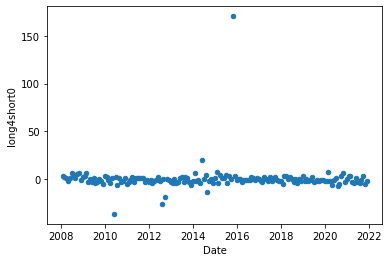

In [87]:
residuals.to_frame().reset_index().plot.scatter(x="Date", y="long4short0")

### Statsmodels

In [100]:
# Rule of Thumb for maglags in HAC:
0.75*(len(X)**(1/3)) 

4.130158834790514

In [122]:
# Rule of Thumb of Greene
(len(X)**(1/4)) 

3.594836294370035

In [124]:
# Woolridge -> Newey West recommendation
4*(len(X)/100)**(2/9)

4.48283279537561

In [117]:
import statsmodels.api as sm
ols = sm.OLS(dfs, X)
# ols_result = ols.fit()
ols_result = ols.fit(cov_type="HAC", cov_kwds={"maxlags": 12})
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            long4short0   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7879
Date:                Tue, 06 Sep 2022   Prob (F-statistic):              0.598
Time:                        11:38:03   Log-Likelihood:                -679.71
No. Observations:                 167   AIC:                             1375.
Df Residuals:                     159   BIC:                             1400.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      2.408      0.005      0.996      -4.708       4.732
VIX            0.0044      0.038      0.115      0.908      -0.071       0.080
VVIX        4.358e-05      0.030      0.001      0.999      -0.058       0.058
Mkt-RF        62.9362     55.429      1.135      0.256     -45.703     171.575
SMB          -74.3014     62.692     -1.185      0.236    -197.175      48.572
HML          -14.0845     22.020     -0.640      0.522     -57.243      29.074
RMW            5.4239     24.551      0.221      0.825     -42.695      53.542
CMA           56.8109     71.623      0.793      0.428     -83.568     197.190
==============================================================================
Omnibus:                      328.483   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108621.432
Skew:                          10.304   Prob(JB):                         0.00
Kurtosis:                     126.230   Cond. No.                     7.78e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 7.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# Result in a Pandas dataframe
result_df = ols_result.summary2(alpha=0.05).tables[2]
result_df

,0,1,2,3
0,Omnibus:,328.483,Durbin-Watson:,1.977
1,Prob(Omnibus):,0.000,Jarque-Bera (JB):,108621.432
2,Skew:,10.304,Prob(JB):,0.000
3,Kurtosis:,126.230,Condition No.:,7783


In [ ]:
exp_path

In [ ]:
result_df

In [ ]:
ols_result.summary2(alpha=0.05).tables[1]

In [92]:
with (path_results/"latex1.txt").open("w") as text_file:
    text_file.write("OLS Summary (concatenated tables):\n\n")
    for table in ols_result.summary(alpha=0.05).tables:
        text_file.write(table.as_latex_tabular())

In [94]:
with (exp_path/"latex2.txt").open("w") as text_file:
    text_file.write("OLS Summary as LaTeX")
    text_file.write(ols_result.summary(alpha=0.05).as_latex())

In [95]:
with (exp_path/"latex3.txt").open("w") as text_file:
    text_file.write("OLS Summary2 as LaTeX")
    text_file.write(ols_result.summary2(alpha=0.05).as_latex())

In [ ]:
with (exp_path/"txt.txt").open("w") as text_file:
    text_file.write(ols_result.summary().as_text())

In [ ]:
with (exp_path/"csv.csv").open("w") as text_file:
    text_file.write(ols_result.summary().as_csv())

In [ ]:
vix_monthly.to_frame().plot()

In [127]:
regressions = ["CAPM", "CAPM_contr", "3FF", "5FF", "CAPM_contr", "3FF_contr", "5FF_contr"]
features = [["Mkt-RF"], 
            ["Mkt-RF", "VIX"], 
            ["Mkt-RF", "VIX", "VVIX"],
            ["Mkt-RF", "SMB", "HML"], 
            ["Mkt-RF", "SMB", "HML", "VIX"], 
            ["Mkt-RF", "SMB", "HML", "VIX", "VVIX"], 
            ["Mkt-RF", "SMB", "HML", "RMW", "CMA"], 
            ["Mkt-RF", "SMB", "HML", "RMW", "CMA", "VIX"],
            ["Mkt-RF", "SMB", "HML", "RMW", "CMA", "VIX", "VVIX"]
            ]

In [137]:
d = {}

In [138]:
for i, reg in enumerate(regressions):
    print(i, reg)
    d[reg] = features[i]

0 CAPM
1 CAPM_contr
2 3FF
3 5FF
4 CAPM_contr
5 3FF_contr
6 5FF_contr


In [139]:
d

{'CAPM': ['Mkt-RF'],
 'CAPM_contr': ['Mkt-RF', 'SMB', 'HML', 'VIX'],
 '3FF': ['Mkt-RF', 'VIX', 'VVIX'],
 '5FF': ['Mkt-RF', 'SMB', 'HML'],
 '3FF_contr': ['Mkt-RF', 'SMB', 'HML', 'VIX', 'VVIX'],
 '5FF_contr': ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']}

In [140]:
d

{'CAPM': ['Mkt-RF'],
 'CAPM_contr': ['Mkt-RF', 'SMB', 'HML', 'VIX'],
 '3FF': ['Mkt-RF', 'VIX', 'VVIX'],
 '5FF': ['Mkt-RF', 'SMB', 'HML'],
 '3FF_contr': ['Mkt-RF', 'SMB', 'HML', 'VIX', 'VVIX'],
 '5FF_contr': ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']}

In [143]:
for reg in d.keys():
    print(d[reg])

['Mkt-RF']
['Mkt-RF', 'SMB', 'HML', 'VIX']
['Mkt-RF', 'VIX', 'VVIX']
['Mkt-RF', 'SMB', 'HML']
['Mkt-RF', 'SMB', 'HML', 'VIX', 'VVIX']
['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']


In [148]:
for i in d.items():
    print(i)

('CAPM', ['Mkt-RF'])
('CAPM_contr', ['Mkt-RF', 'SMB', 'HML', 'VIX'])
('3FF', ['Mkt-RF', 'VIX', 'VVIX'])
('5FF', ['Mkt-RF', 'SMB', 'HML'])
('3FF_contr', ['Mkt-RF', 'SMB', 'HML', 'VIX', 'VVIX'])
('5FF_contr', ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'])


In [170]:
factors[factors.columns[factors.columns.isin(["VIX"])]]

,VIX
Date,
2008-01-31,26.20
2008-02-29,26.54
2008-03-31,25.61
2008-04-30,20.79
2008-05-31,17.83
...,...
2021-07-31,18.24
2021-08-31,16.48
2021-09-30,23.14


In [278]:
path_data = Path(r"C:\Users\Mathiass\OneDrive - Universität Zürich UZH\Documents\mt_literature\data\FamaFrench")

In [288]:
mom_monthly = pd.read_csv(path_data/"F-F_Momentum_Factor.csv", skiprows=13).iloc[:1144]
# Rename Unnamed: 0 to Date and convert to appropriate Datetime format.
mom_monthly = mom_monthly.rename(columns={"Unnamed: 0": "Date"})
mom_monthly["Date"] = pd.to_datetime(mom_monthly["Date"], format="%Y%m") + MonthEnd(0)
mom_monthly = mom_monthly.set_index("Date")
# Convert Mom column to float (have been read as strings):
mom_monthly = mom_monthly.rename(columns={mom_monthly.columns.item(): mom_monthly.columns.item().rstrip()})
mom_monthly["Mom"] =  mom_monthly["Mom"].astype("float")
# Divide by 100 (numbers are in percent).
mom_monthly =  mom_monthly / 100

In [292]:
mom_monthly.columns.item().upper()

'MOM'